In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import plotly.express as px 
sns.set_style('darkgrid')
from datetime import datetime
from dateutil.tz import *

## Data Exploration and Cleaning

In [169]:
sr_df = pd.read_csv("C:/Users/Jaswinder Singh/Downloads/DMML/Data/Solar Radiation Prediction/Solar_Radiation.csv")
sr_df_copy = sr_df

In [208]:
sr_df.head(5).T

,0,1,2,3,4
Data,2016-09-29,2016-09-29,2016-09-29,2016-09-29,2016-09-29
Time,23:55:26,23:50:23,23:45:26,23:40:21,23:35:24
Radiation(W/sq.m),1.21,1.21,1.23,1.21,1.17
Temperature(F),48,48,48,48,48
Pressure(mm Hg),30.46,30.46,30.46,30.46,30.46
Humidity(%),59,58,57,60,62
Wind_Direction(degrees),177.39,176.78,158.75,137.71,104.95
Speed(mph),5.62,3.37,3.37,3.37,5.62
TimeSunRise,06:13:00,06:13:00,06:13:00,06:13:00,06:13:00
TimeSunSet,18:13:00,18:13:00,18:13:00,18:13:00,18:13:00


In [171]:
sr_df.shape

(32686, 11)

In [221]:
sr_df.describe()

,Radiation(W/sq.m),Temperature(F),Pressure(mm Hg),Humidity(%),Wind_Direction(degrees),Speed(mph),Hours_of_light,Rel_time
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,11.509176,0.482959
std,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,0.498854,0.602432
min,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,10.933333,-0.634602
25%,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,11.033333,-0.040139
50%,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,11.400000,0.484332
75%,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,11.916667,1.006038
max,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,12.516667,1.566061


In [172]:
sr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


As we can see there are no null values in our data

1. Parsing date time data

In [173]:
#Converting UNIX time to datetime object
sr_df['Date']= pd.to_datetime(sr_df['UNIXTime'],unit='s')

#Setting the right timezone to the datetime object
sr_df['Date'] = sr_df['Date'].dt.tz_localize('UTC').dt.tz_convert('HST')

#Extracting date from the Data Column

sr_df['Data'] = pd.to_datetime(sr_df['Data']).dt.date

sr_df['TimeSunRise'] = pd.to_datetime(sr_df['TimeSunRise']).dt.time
sr_df['TimeSunSet'] = pd.to_datetime(sr_df['TimeSunSet']).dt.time

#Creating new sunset/sunrise columns featuring also the right date
sr_df['sunrise_time'] = sr_df.apply(lambda row: pd.datetime.combine(row['Data'], row['TimeSunRise']), axis = 1)
sr_df['sunset_time'] = sr_df.apply(lambda row: pd.datetime.combine(row['Data'], row['TimeSunSet']), axis = 1)

#Adding approriate timezone
sr_df['sunrise_time'] = sr_df['sunrise_time'].dt.tz_localize('HST')
sr_df['sunset_time'] = sr_df['sunset_time'].dt.tz_localize('HST')

<ipython-input-173-029f51fda003>:15: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  sr_df['sunrise_time'] = sr_df.apply(lambda row: pd.datetime.combine(row['Data'], row['TimeSunRise']), axis = 1)
<ipython-input-173-029f51fda003>:16: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  sr_df['sunset_time'] = sr_df.apply(lambda row: pd.datetime.combine(row['Data'], row['TimeSunSet']), axis = 1)


2. Renaming the columns (specifying the units)

In [174]:
sr_df.rename({'Radiation': 'Radiation(W/sq.m)', 'Temperature': 'Temperature(F)', 
              'Pressure': 'Pressure(mm Hg)', 'Humidity': 'Humidity(%)',
                'Speed': 'Speed(mph)', 'WindDirection(Degrees)':'Wind_Direction(degrees)'}, axis=1, inplace=True)

sr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   UNIXTime                 32686 non-null  int64              
 1   Data                     32686 non-null  object             
 2   Time                     32686 non-null  object             
 3   Radiation(W/sq.m)        32686 non-null  float64            
 4   Temperature(F)           32686 non-null  int64              
 5   Pressure(mm Hg)          32686 non-null  float64            
 6   Humidity(%)              32686 non-null  int64              
 7   Wind_Direction(degrees)  32686 non-null  float64            
 8   Speed(mph)               32686 non-null  float64            
 9   TimeSunRise              32686 non-null  object             
 10  TimeSunSet               32686 non-null  object             
 11  Date                     326

3. Visualisations

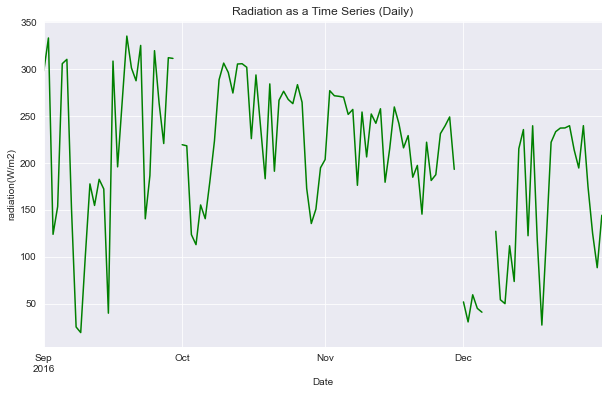

In [98]:
#Plotting radiation as a time series
sr_df2 = sr_df
sr_df2['Date'] = pd.to_datetime(sr_df2['Data']).dt.date.astype(str)
sr_df2['TimeSunRise'] = sr_df2['Date'] + ' ' + sr_df2['TimeSunRise']
sr_df2['TimeSunSet'] = sr_df2['Date'] + ' ' + sr_df2['TimeSunSet']
sr_df2['Date'] = sr_df2['Date'] + ' ' + sr_df2['Time']

sr_df2 = sr_df2.sort_values('Date').reset_index(drop=True)
sr_df2.set_index('Date', inplace=True)
sr_df2.drop(['Data', 'Time', 'UNIXTime'], axis=1, inplace=True)
sr_df2.index = pd.to_datetime(sr_df2.index)
sr_df2.head()
fig, ax = plt.subplots(figsize=(10, 6))
sr_df2.groupby(pd.Grouper(freq="D"))['Radiation(W/sq.m)'].mean().plot(ax=ax, style=['-'], color='green')
ax.set_title('Radiation as a Time Series (Daily)', fontsize=12)
ax.set_ylabel('radiation(W/m2)')
plt.show()

3.1 Boxplots

c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please 

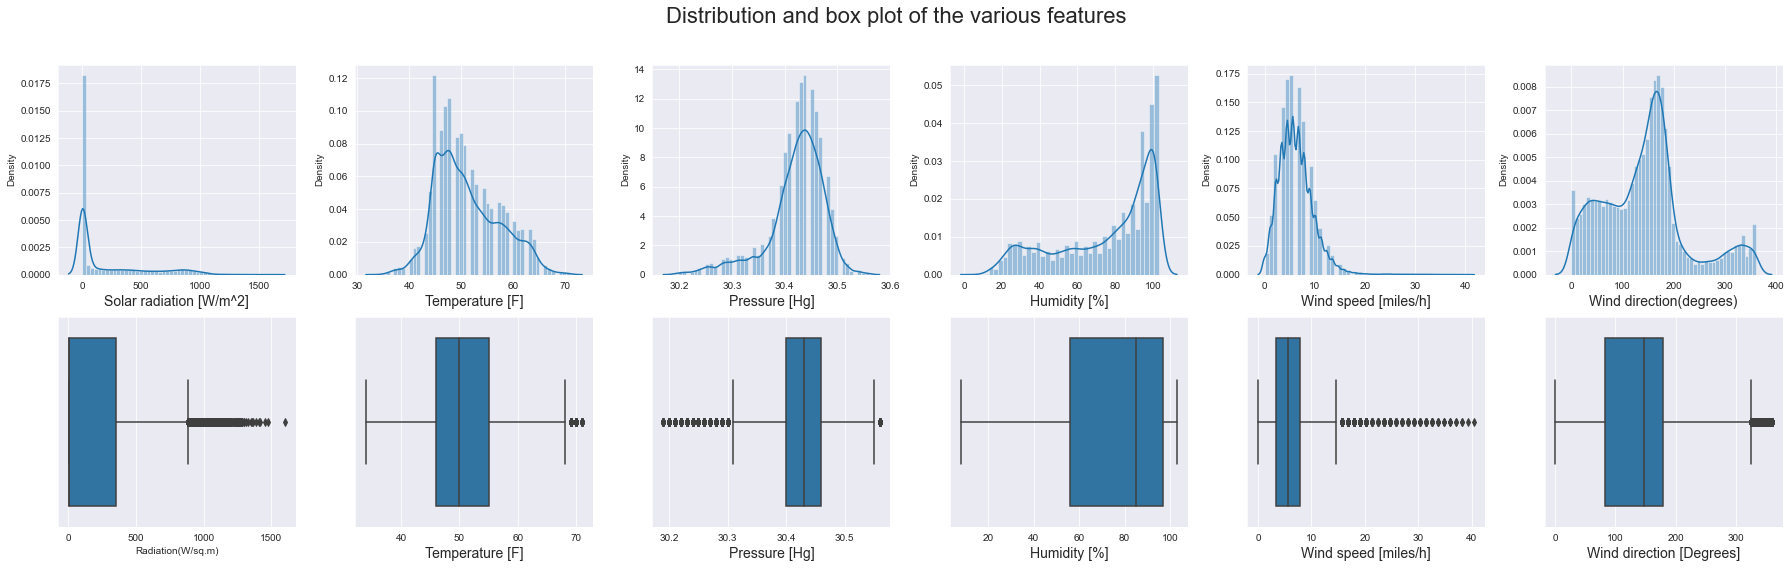

In [175]:
fig, ax = plt.subplots(nrows =2, ncols = 6, figsize = (25, 8))

sns.distplot(sr_df['Radiation(W/sq.m)'], ax = ax[0,0])
ax[0,0].set_xlabel('Solar radiation [W/m^2]', fontsize = 14)

sns.distplot(sr_df['Temperature(F)'], ax = ax[0,1])
ax[0,1].set_xlabel('Temperature [F]', fontsize = 14)

sns.distplot(sr_df['Pressure(mm Hg)'], ax = ax[0,2])
ax[0,2].set_xlabel('Pressure [Hg]', fontsize = 14)

sns.distplot(sr_df['Humidity(%)'], ax = ax[0,3])
ax[0,3].set_xlabel('Humidity [%]', fontsize = 14)

sns.distplot(sr_df['Speed(mph)'], ax = ax[0,4])
ax[0,4].set_xlabel('Wind speed [miles/h]', fontsize = 14)

sns.distplot(sr_df['Wind_Direction(degrees)'], ax = ax[0,5])
ax[0,5].set_xlabel('Wind direction(degrees)', fontsize = 14)


sns.boxplot(sr_df['Radiation(W/sq.m)'], ax = ax[1,0])

sns.boxplot(sr_df['Temperature(F)'], ax = ax[1,1])
ax[1,1].set_xlabel('Temperature [F]', fontsize = 14)

sns.boxplot(sr_df['Pressure(mm Hg)'], ax = ax[1,2])
ax[1,2].set_xlabel('Pressure [Hg]', fontsize = 14)

sns.boxplot(sr_df['Humidity(%)'], ax = ax[1,3])
ax[1,3].set_xlabel('Humidity [%]', fontsize = 14)

sns.boxplot(sr_df['Speed(mph)'], ax = ax[1,4])
ax[1,4].set_xlabel('Wind speed [miles/h]', fontsize = 14)

sns.boxplot(sr_df['Wind_Direction(degrees)'], ax = ax[1,5])
ax[1,5].set_xlabel('Wind direction [Degrees]', fontsize = 14)

fig.suptitle('Distribution and box plot of the various features', fontsize = 22)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

## Feature Selection and Engineering

As a first step, it is reasonable to consider that all the information contained in the dataset are useful for the prediction of the target variable. Therefore, the following features will be considered:
1. Temperature
2. Pressure
3. Humidity
4. Wind speed
5. Wind direction \
It is also important to include features giving an indication of the time and date, because the solar radiation changes according to the solar position in the sky, and to the duration of the solar day. For this reason, two new features are included in the dataset: the relative time of the day (Rel_time), and the duration of the solar day (Hours of light).

The relative time of the day is defined as follows: (current time - sunrise_time)/(sunrise_time - sunset_time)

It assumes the following values:

< 0 before sunrise \
= 0 at sunrise \
'>' 0 but < 1 between sunrise and sunset \
= 1 at sunset \
'>' 1 after sunset \
The duration of the solar day is instead computed by subtracting the sunrise time from the sunset time.

In [176]:
#Converting sunrise and sunset times into timestamp
sr_df['sunrise_timestamp'] = sr_df.apply(lambda row: datetime.timestamp(row['sunrise_time']), axis = 1)
sr_df['sunset_timestamp'] = sr_df.apply(lambda row: datetime.timestamp(row['sunset_time']), axis = 1)

#Creating a column containing the number of daily light hours
sr_df['Hours_of_light'] = (sr_df['sunset_timestamp'] - sr_df['sunrise_timestamp'])/60/60

#Creating column describing current time relative to sunrise/sunset
sr_df['Rel_time'] = (sr_df['UNIXTime']- sr_df['sunrise_timestamp'])/(sr_df['sunset_timestamp'] - sr_df['sunrise_timestamp'])

In [177]:
sr_df.head()

,UNIXTime,Data,Time,Radiation(W/sq.m),Temperature(F),Pressure(mm Hg),Humidity(%),Wind_Direction(degrees),Speed(mph),TimeSunRise,TimeSunSet,Date,sunrise_time,sunset_time,sunrise_timestamp,sunset_timestamp,Hours_of_light,Rel_time
0,1475229326,2016-09-29,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,2016-09-29 23:55:26-10:00,2016-09-29 06:13:00-10:00,2016-09-29 18:13:00-10:00,1.475166e+09,1.475209e+09,12.0,1.475602
1,1475229023,2016-09-29,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,2016-09-29 23:50:23-10:00,2016-09-29 06:13:00-10:00,2016-09-29 18:13:00-10:00,1.475166e+09,1.475209e+09,12.0,1.468588
2,1475228726,2016-09-29,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,2016-09-29 23:45:26-10:00,2016-09-29 06:13:00-10:00,2016-09-29 18:13:00-10:00,1.475166e+09,1.475209e+09,12.0,1.461713
3,1475228421,2016-09-29,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,2016-09-29 23:40:21-10:00,2016-09-29 06:13:00-10:00,2016-09-29 18:13:00-10:00,1.475166e+09,1.475209e+09,12.0,1.454653
4,1475228124,2016-09-29,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,2016-09-29 23:35:24-10:00,2016-09-29 06:13:00-10:00,2016-09-29 18:13:00-10:00,1.475166e+09,1.475209e+09,12.0,1.447778


In [178]:
sr_df.drop(columns = ['UNIXTime','sunrise_timestamp', 'sunset_timestamp', 
                     'sunset_time', 'sunrise_time'], inplace = True)

In [179]:
sr_df.head()

,Data,Time,Radiation(W/sq.m),Temperature(F),Pressure(mm Hg),Humidity(%),Wind_Direction(degrees),Speed(mph),TimeSunRise,TimeSunSet,Date,Hours_of_light,Rel_time
0,2016-09-29,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,2016-09-29 23:55:26-10:00,12.0,1.475602
1,2016-09-29,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,2016-09-29 23:50:23-10:00,12.0,1.468588
2,2016-09-29,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,2016-09-29 23:45:26-10:00,12.0,1.461713
3,2016-09-29,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,2016-09-29 23:40:21-10:00,12.0,1.454653
4,2016-09-29,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,2016-09-29 23:35:24-10:00,12.0,1.447778


Correlation Matrix 

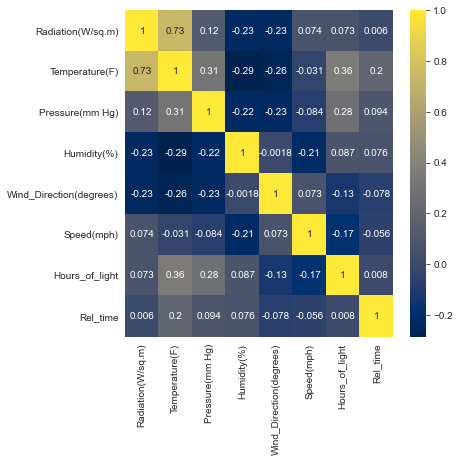

In [180]:
#Plotting a heatmap of the various features in the dataset
fig, ax = plt.subplots(figsize = (6,6))
sns.heatmap(sr_df.corr(), annot = True, cmap = 'cividis')
plt.show()

Scatter plot of different features

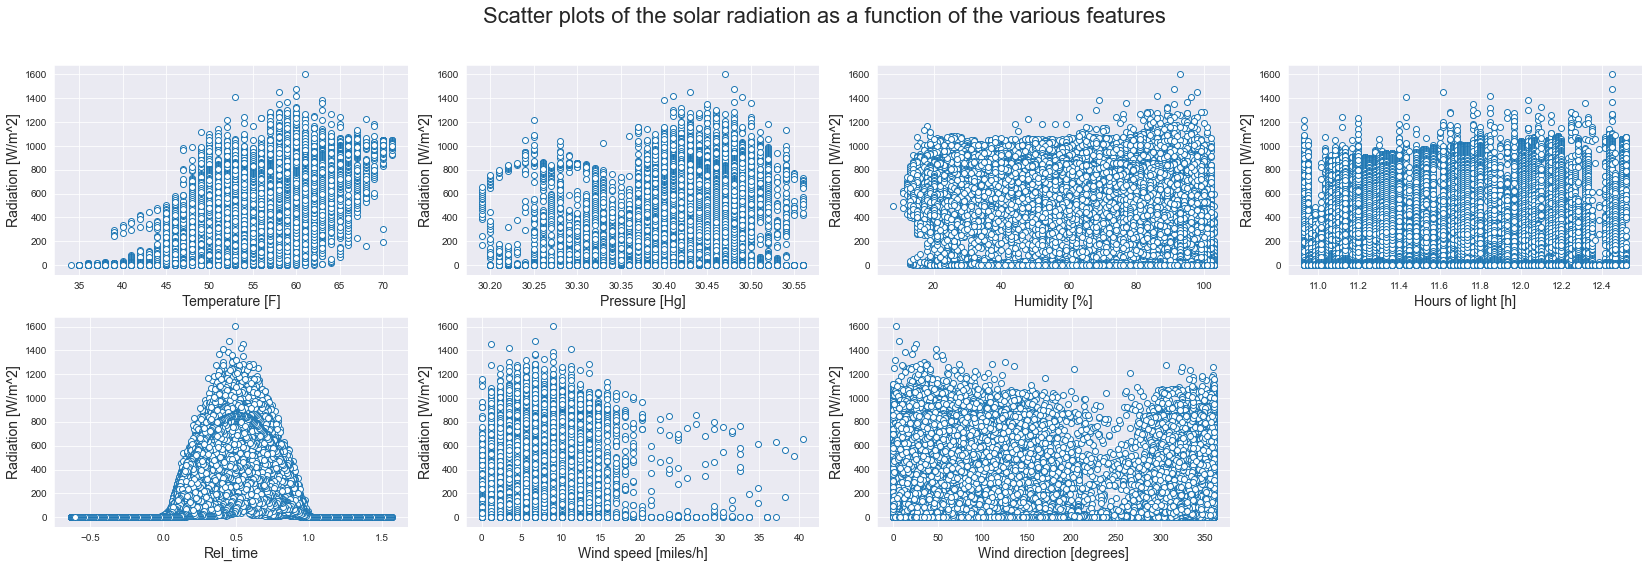

In [181]:
fig, ax = plt.subplots(nrows =2, ncols = 4, figsize = (23,8))

ax[0,0].plot(sr_df['Temperature(F)'], sr_df['Radiation(W/sq.m)'],'o', markerfacecolor='w')
ax[0,0].set_xlabel('Temperature [F]', fontsize = 14)
ax[0,0].set_ylabel('Radiation [W/m^2]', fontsize = 14)

ax[0,1].plot(sr_df['Pressure(mm Hg)'], sr_df['Radiation(W/sq.m)'],'o', markerfacecolor='w')
ax[0,1].set_xlabel('Pressure [Hg]', fontsize = 14)
ax[0,1].set_ylabel('Radiation [W/m^2]', fontsize = 14)

ax[0,2].plot(sr_df['Humidity(%)'], sr_df['Radiation(W/sq.m)'],'o', markerfacecolor='w')
ax[0,2].set_xlabel('Humidity [%]', fontsize = 14)
ax[0,2].set_ylabel('Radiation [W/m^2]', fontsize = 14)

ax[0,3].plot(sr_df['Hours_of_light'], sr_df['Radiation(W/sq.m)'],'o', markerfacecolor='w')
ax[0,3].set_xlabel('Hours of light [h]', fontsize = 14)
ax[0,3].set_ylabel('Radiation [W/m^2]', fontsize = 14)


ax[1,0].plot(sr_df['Rel_time'], sr_df['Radiation(W/sq.m)'],'o', markerfacecolor='w')
ax[1,0].set_xlabel('Rel_time', fontsize = 14)
ax[1,0].set_ylabel('Radiation [W/m^2]', fontsize = 14)

ax[1,1].plot(sr_df['Speed(mph)'], sr_df['Radiation(W/sq.m)'],'o', markerfacecolor='w')
ax[1,1].set_xlabel('Wind speed [miles/h]', fontsize = 14)
ax[1,1].set_ylabel('Radiation [W/m^2]', fontsize = 14)

ax[1,2].plot(sr_df['Wind_Direction(degrees)'], sr_df['Radiation(W/sq.m)'],'o', markerfacecolor='w')
ax[1,2].set_xlabel('Wind direction [degrees]', fontsize = 14)
ax[1,2].set_ylabel('Radiation [W/m^2]', fontsize = 14)


fig.delaxes(ax[1,3])

fig.suptitle('Scatter plots of the solar radiation as a function of the various features', fontsize = 22)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

In [165]:
def total_seconds(series):
    return series.hour*60*60 + series.minute*60 + series.second

In [182]:
# #Feature Extraction
# sr_df_copy['MonthOfYear'] = sr_df_copy.index.strftime('%m').astype(int)
# sr_df_copy['DayOfYear'] = sr_df_copy.index.strftime('%j').astype(int)
# sr_df_copy['WeekOfYear'] = sr_df_copy.index.strftime('%U').astype(int)
# sr_df_copy['TimeOfDay(h)'] = sr_df_copy.index.hour
# sr_df_copy['TimeOfDay(m)'] = sr_df_copy.index.hour*60 + sr_df_copy.index.minute
# sr_df_copy['TimeOfDay(s)'] = total_seconds(sr_df_copy.index)
# sr_df_copy['TimeSunRise'] = pd.to_datetime(sr_df_copy['TimeSunRise'])
# sr_df_copy['TimeSunSet'] = pd.to_datetime(sr_df_copy['TimeSunSet'])
# sr_df_copy['DayLength(s)'] = total_seconds(sr_df_copy['TimeSunSet'].dt) - total_seconds(sr_df_copy['TimeSunRise'].dt)
# sr_df_copy['TimeAfterSunRise(s)'] = total_seconds(sr_df_copy.index) - total_seconds(sr_df_copy['TimeSunRise'].dt)
# sr_df_copy['TimeBeforeSunSet(s)'] = total_seconds(sr_df_copy['TimeSunSet'].dt) - total_seconds(sr_df_copy.index)
# sr_df_copy['RelativeTOD'] = sr_df_copy['TimeAfterSunRise(s)'] / sr_df_copy['DayLength(s)']
# sr_df_copy.drop(['TimeSunRise','TimeSunSet'], inplace=True, axis=1)
# sr_df_copy.head()

## Modelling and Predictions

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold, RandomizedSearchCV
kf = KFold(shuffle=True, random_state=19)


In [184]:
#Splitting the data
df = sr_df

#Splitting dataset into labels and features
X = df.drop(columns = {'Radiation(W/sq.m)', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet', 'Date'})
y = df['Radiation(W/sq.m)']

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.3,
                                                   random_state = 42)

In [186]:
X_train

,Temperature(F),Pressure(mm Hg),Humidity(%),Wind_Direction(degrees),Speed(mph),Hours_of_light,Rel_time
28075,57,30.49,94,7.95,4.50,10.933333,0.782470
23227,64,30.47,32,93.21,9.00,11.333333,0.513358
16671,44,30.45,45,337.58,1.12,11.050000,0.032102
18527,50,30.44,102,88.19,3.37,11.116667,1.214443
2165,52,30.40,34,168.99,7.87,12.133333,0.088416
...,...,...,...,...,...,...,...
29802,50,30.28,96,304.22,12.37,10.950000,0.726256
5390,44,30.37,100,162.80,3.37,12.366667,-0.254155
860,48,30.42,64,158.90,4.50,12.050000,1.387713
15795,56,30.42,99,55.72,13.50,11.933333,0.609427


Random Forest

In [188]:
#Initiating Random Forest regressor
rf_model = RandomForestRegressor(random_state = 42)

#Define the grid of hyperparameters
params_rf = {
    'n_estimators': [500, 600, 700],
    'max_depth': [5, 6, 7],
    'min_samples_leaf': [0.075, 0.05, 0.025],
    'max_features': ['log2', 'sqrt']   
}


#Initiate Grid search
grid_rf = GridSearchCV(estimator = rf_model,
                       param_grid = params_rf,
                       cv = 3,
                       scoring = 'neg_mean_squared_error',
                       verbose = 1,
                       n_jobs = -1)

In [189]:
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  1.1min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.075, 0.05, 0.025],
                         'n_estimators': [500, 600, 700]},
             scoring='neg_mean_squared_error', verbose=1)

In [209]:
#Extracting best hyperparameters
rf_best_hyperparams = grid_rf.best_params_
print('Best hyperparameters for Random Forest: \n', rf_best_hyperparams)

Best hyperparameters for Random Forest: 
 {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 0.025, 'n_estimators': 500}


In [191]:
rf = grid_rf.best_estimator_

In [192]:
#Checking if there is overfitting through the use of Cross validation
rf_MSE_CV = -cross_val_score(rf, X_train, y_train,
                            cv = 10, 
                            scoring = 'neg_mean_squared_error',
                            n_jobs = -1)

In [193]:
#Computing Random Forest predictions in the traning and test sets
rf_predict_train = rf.predict(X_train)
rf_predict_test = rf.predict(X_test)

In [210]:
#Computing the MSE in the traning set, test set, and cross-validation procedure
print('Cross Validation MSE for Random Forest:{:.2f}'.format(rf_MSE_CV.mean()))
print('Train MSE for Random Forest:{:.2f}'.format(MSE(y_train,rf_predict_train)))
print('Test MSE for Random Forest:{:.2f}'.format(MSE(y_test,rf_predict_test)))

Cross Validation MSE for Random Forest:23167.14
Train MSE for Random Forest:22802.18
Test MSE for Random Forest:23363.53


In [195]:
#Computing the R^2 in the traning set and test set for the Random Forest Regressor
print('Random Forest, R^2 score training set:{:.2f}'.format(r2_score(y_train, rf_predict_train)))
print('Random Forest, R^2 score test set:{:.2f}'.format(r2_score(y_test,rf_predict_test)))

Random Forest, R^2 score training set:0.77
Random Forest, R^2 score test set:0.77


Gradient Boost

In [197]:
#Initiating Gradient Boosting regressor
gradient_boost = GradientBoostingRegressor(random_state = 42)

#Define the grid of hyperparameters
parameters_gb = {
    'n_estimators': [200, 300, 600],
    'max_depth': [2, 3,5],
    'min_samples_leaf': [0.125, 0.1, 0.075],
    'max_features': ['log2', 'sqrt']   
}


#Initiate Grid search
grid_gb = GridSearchCV(estimator = gradient_boost,
                       param_grid = parameters_gb,
                       cv = 3,
                       scoring = 'neg_mean_squared_error',
                       verbose = 1,
                       n_jobs = -1)

In [198]:
grid_gb.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   35.4s finished


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.125, 0.1, 0.075],
                         'n_estimators': [200, 300, 600]},
             scoring='neg_mean_squared_error', verbose=1)

In [199]:
#Extracting best hyperparameters
gb_best_hyperparams = grid_gb.best_params_
print('Best hyperparameters for GB: \n', gb_best_hyperparams)

Best hyperparameters for GB: 
 {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 0.075, 'n_estimators': 600}


In [200]:
gb = grid_gb.best_estimator_

In [201]:
#Checking if there is overfitting through the use of Cross validation
gb_MSE_CV = -cross_val_score(gb, X_train, y_train,
                            cv = 10, 
                            scoring = 'neg_mean_squared_error',
                            n_jobs = -1)

In [202]:
#Computing Gradient Boosting predictions on the train and test stes
gb_predict_train = gb.predict(X_train)
gb_predict_test = gb.predict(X_test)

In [222]:
#GB CV MSE
print('CV MSE for Gradient Boost:{:.2f}'.format(gb_MSE_CV.mean()))
print('Train MSE for Gradient Boost:{:.2f}'.format(MSE(y_train,gb_predict_train)))
print('Test MSE for Gradient Boost:{:.2f}'.format(MSE(y_test,gb_predict_test)))

CV MSE for Gradient Boost:10462.65
Train MSE for Gradient Boost:9722.71
Test MSE for Gradient Boost:10695.07


In [205]:
#Computing the R^2 in the traning set and test set for the Gradient Boosting Regressor
print('Gradient Boosting, R^2 score training set:{:.2f}'.format(r2_score(y_train, gb_predict_train)))
print('Gradient Boosting, R^2 score test set:{:.2f}'.format(r2_score(y_test,gb_predict_test)))


Gradient Boosting, R^2 score training set:0.90
Gradient Boosting, R^2 score test set:0.89


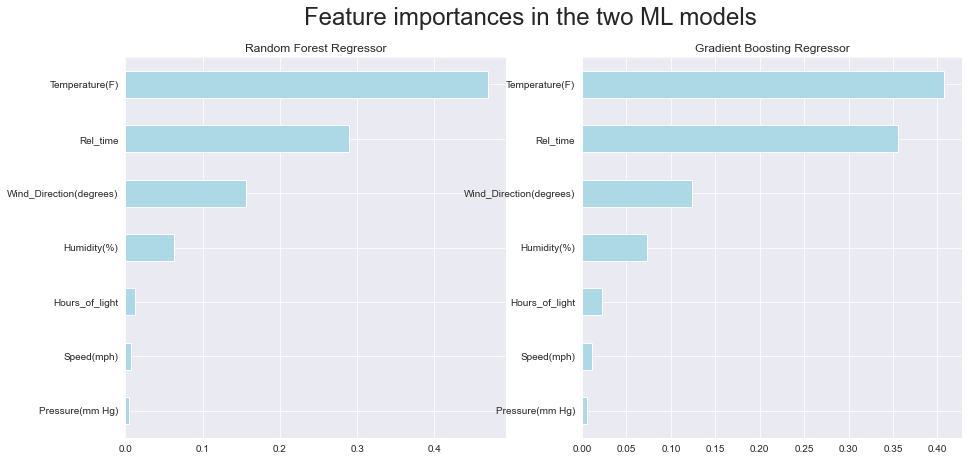

In [223]:
#Plotting feature importances for Random Forest and Gradient boosting

#Creating a pd.Series of feature importances
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
importances_gb = pd.Series(gb.feature_importances_, index = X.columns)

#Sorting importances
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_gb = importances_gb.sort_values()

#Plotting sorted importances
fig, ax = plt.subplots(ncols = 2, figsize = (15,7))
sorted_importances_rf.plot(kind = 'barh', color = 'lightblue', ax = ax[0])
sorted_importances_gb.plot(kind = 'barh', color = 'lightblue', ax = ax[1])
ax[0].set_title('Random Forest Regressor')
ax[1].set_title('Gradient Boosting Regressor')
fig.suptitle('Feature importances in the two ML models', fontsize = 24)
plt.show()

In [219]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
RF_MAPE = MAPE(y_train, rf_predict_train)
GB_MAPE = MAPE(y_train, gb_predict_train)
print("Mean Absolute percentage error for random forest: ", RF_MAPE, "\n")
print("Mean Absolute percentage error for Gradient Boost: ", GB_MAPE)

Mean Absolute percentage error for random forest:  1641.381371855125 

Mean Absolute percentage error for Gradient Boost:  614.498317893741
